In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Load Dataset
df = pd.read_csv(r"c:\Users\Yusma\Desktop\Python\workspace\Space_Corrected.csv")

## Data Exploring

In this section, we will check the data in the columns, and explore if there are any null values etc

In [2]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [3]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [4]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

In [5]:
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission'],
      dtype='object')


In [6]:
df = df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1)

In [7]:
df.columns = df.columns.str.strip()
df.columns

Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       'Rocket', 'Status Mission'],
      dtype='object')

## Ananlysis on the Data

In this section, we are going to ...

In [8]:
status = df['Status Mission'].value_counts().reset_index()
status.columns = ['index', 'Status Mission']
status

,index,Status Mission
0,Success,3879
1,Failure,339
2,Partial Failure,102
3,Prelaunch Failure,4


### convert to datetime object

In [9]:
# convert to to datetime obj
df['date'] = pd.to_datetime(df['Datum'], format='mixed', utc=True)
df['date']

0      2020-08-07 05:12:00+00:00
1      2020-08-06 04:01:00+00:00
2      2020-08-04 23:57:00+00:00
3      2020-07-30 21:25:00+00:00
4      2020-07-30 11:50:00+00:00
                  ...           
4319   1958-02-05 07:33:00+00:00
4320   1958-02-01 03:48:00+00:00
4321   1957-12-06 16:44:00+00:00
4322   1957-11-03 02:30:00+00:00
4323   1957-10-04 19:28:00+00:00
Name: date, Length: 4324, dtype: datetime64[ns, UTC]

In [10]:
# limit to year
df['year'] = df['date'].dt.year
df['year']

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
4319    1958
4320    1958
4321    1957
4322    1957
4323    1957
Name: year, Length: 4324, dtype: int32

In [11]:
most_missions = df['Company Name'].value_counts().head(10)
most_missions

Company Name
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: count, dtype: int64

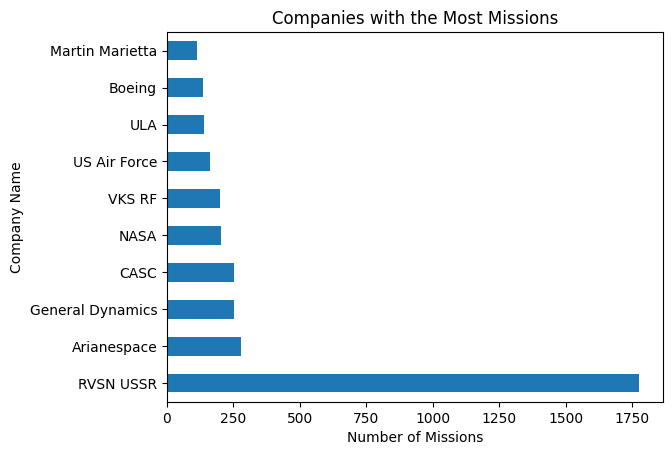

In [12]:
#plotting
most_missions.plot(kind='barh', title="Companies with the Most Missions")
plt.ylabel('Company Name')
plt.xlabel('Number of Missions')
plt.show()

In [19]:
#convert 'Rocket' to numeric
df['Rocket'] = pd.to_numeric(df['Rocket'], errors='coerce')
# groupby total money spent per company
total_cost = df.groupby(['Company Name'])["Rocket"].sum().reset_index()

total_cost = total_cost[total_cost["Rocket"] >0]

total_cost

,Company Name,Rocket
3,Arianespace,16345.00
6,Boeing,1241.00
7,CASC,6340.26
12,EER,20.00
13,ESA,37.00
14,Eurockot,543.40
15,ExPace,28.30
19,ILS,1320.00
23,ISRO,2177.00
24,JAXA,168.00


In [21]:
sorted_total_cost = total_cost.sort_values(by='Rocket', ascending=False)
sorted_total_cost

,Company Name,Rocket
35,NASA,61200.00
3,Arianespace,16345.00
48,ULA,14798.00
7,CASC,6340.26
46,SpaceX,5444.00
36,Northrop,3930.00
32,MHI,3532.50
23,ISRO,2177.00
49,US Air Force,1550.92
52,VKS RF,1548.90


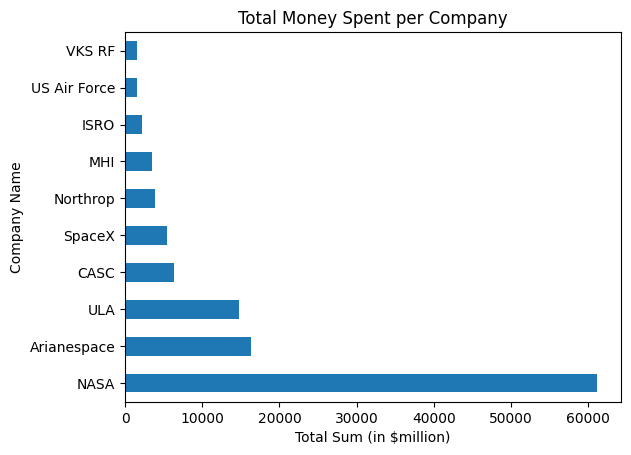

In [15]:
sorted_total_cost.head(10).plot(kind='barh', x = 'Company Name', y = 'Rocket', title="Total Money Spent per Company", legend=False)
plt.ylabel('Company Name')
plt.xlabel('Total Sum (in $million)')
plt.show()

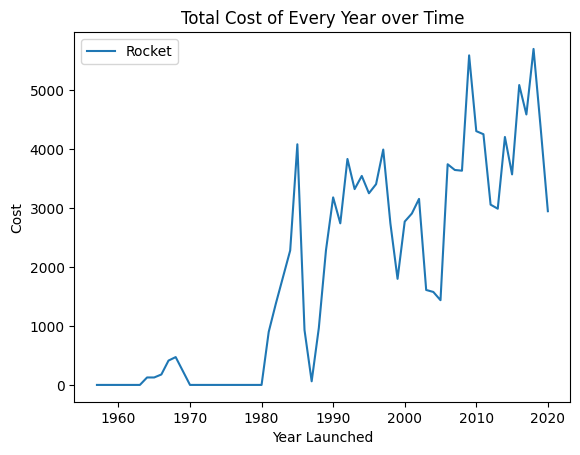

In [ ]:
yearly_cost = df.groupby('year')['Rocket'].sum().reset_index()

yearly_cost.plot(kind='line', x = 'year', y = 'Rocket', title = 'Total Annual Cost of Rockets Over Time')
plt.xlabel('Year Launched')
plt.ylabel('Cost')
plt.show()

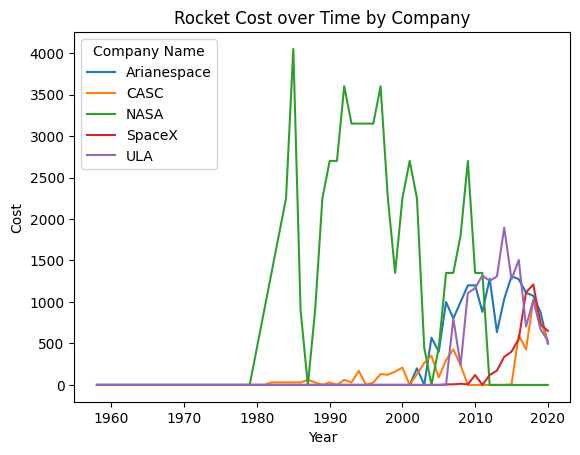

In [17]:
# per company
cost_by_year_company = df.groupby(['year', 'Company Name'])['Rocket'].sum().reset_index()

top_companies = df.groupby('Company Name')['Rocket'].sum().nlargest(5).index

filtered = cost_by_year_company[cost_by_year_company['Company Name'].isin(top_companies)]

pivoted = filtered.pivot(index = 'year', columns = 'Company Name', values = 'Rocket')
pivoted = pivoted.fillna(0)

#plotting
pivoted.plot(kind='line', title = 'Rocket Cost over Time by Company')
plt.xlabel("Year")
plt.ylabel("Cost")
plt.show()